Let do better this time.
- set seeds for repeatabilty
- use cross validated scores to help evaluate model performance

Looking better.
- Do we have any idea how this model might perform before submitting? **yes**
- Is this result repeatable? **yes**
- Can we make a better RF model? **maybe?**

In [6]:
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import make_scorer
from kaggle.data import load_data, save_submission
from kaggle.metrics import rmse_log
from kaggle.plot import plot_actual_predicted

In [3]:
# loading data
y, X, X_submission, ids_submission = load_data()

# create CV folds
kf = KFold(5, random_state=1773)

# define model
model = RandomForestRegressor(random_state=1773)

# define scoring method to evaluate model
scorer = make_scorer(rmse_log, greater_is_better=False)

In [4]:
# evaluate model
scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)
print 'RMSE: %0.3f (+/- %0.3f)' % (scores.mean(), scores.std() * 2)

RMSE: -0.154 (+/- 0.022)


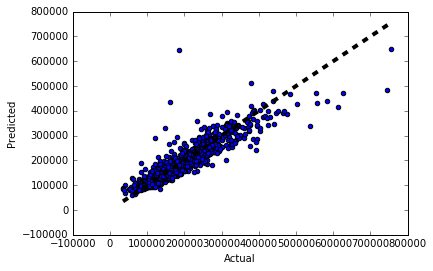

In [7]:
# plot CV preditions versus actuals
predicted = cross_val_predict(model, X, y, cv=kf)
plot_actual_predicted(y, predicted)

In [8]:
# train model
model.fit(X, y)

# create predicitons
y_pred = model.predict(X_submission)

# save submission
save_submission(ids_submission, y_pred, '02_default_random_forest')